# Naive Bayes Classification in Stock Outperformance Prediction

The [Naive Bayes Classifier](http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/) technique is based on the so-called Bayesian theorem and is particularly suited when the dimensionality of the inputs is high. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

### Bayes' Theorem

The algorithm is based on the famous [___Bayes theorem___](https://en.wikipedia.org/wiki/Bayes%27_theorem) named after Rev. Thomas Bayes. It works on conditional probability. [Conditional probability](https://en.wikipedia.org/wiki/Conditional_probability) is the probability that something will happen, given that something else has already occurred. Using the conditional probability, we can calculate the probability of an event using its prior knowledge.

Bayes' theorem is stated mathematically as the following equation:

$${\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}},}$$
where $A$ and $B$ are events and $P(B)\neq{0}$.

$P(A\mid B)$ is a [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability): the likelihood of event $A$ occurring given that $B$ is true.

$P(B\mid A)$ is also a conditional probability: the likelihood of event $B$ occurring given that $A$ is true.

$P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other; this is known as the [marginal probability](https://en.wikipedia.org/wiki/Marginal_probability).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in the data and perform basic exploratory analysis

#### Data set

In [2]:
df = pd.read_csv('pseifinancialratios.csv')

#### Basic statistics of the features

In [3]:
df.iloc[:,1:].describe()

,Performance,Earnings.per.Share,Price.to.Sales,Operating.Margins,Price.to.Book,ROE,ROA,PE,Debt.to.Equity,Book.Value.Per.Share,Net.Debt.to.EBITDA,Current.Ratio,Profit.Margin,Total.Debt.to.Total.Asset,Operating.Margin,Return.on.Capital,FCF.to.Basic.Share,Tangible.Book.value.per.Share
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.470930,6.158692,2.058488,18.824709,1.966221,19.692878,141387.903256,20.066105,96.626279,174.125291,3.098227,1.578488,13.299797,35.129622,18.824709,8.644041,-2.519971,141.140378
std,0.499881,12.367309,2.087610,12.688316,1.340436,13.565596,171335.595970,17.347403,59.045012,267.172273,4.416816,0.859743,9.618380,13.025625,12.688316,3.994895,18.140190,234.117839
min,0.000000,-1.590000,0.030000,-8.710000,0.220000,-4.780000,-251383.760000,2.750000,7.130000,0.440000,-21.600000,0.300000,-19.860000,4.220000,-8.710000,1.400000,-103.110000,-7.570000
25%,0.000000,0.210000,0.890000,9.027500,0.922500,10.575000,16168.735000,10.362500,52.752500,11.362500,1.297500,1.095000,6.692500,26.062500,9.027500,5.875000,-1.125000,9.695000
50%,0.000000,0.700000,1.545000,16.870000,1.525000,17.295000,110710.000000,15.350000,79.905000,30.870000,2.745000,1.445000,11.820000,34.930000,16.870000,8.095000,0.060000,19.470000
75%,1.000000,5.942500,2.440000,24.875000,2.825000,24.107500,240675.170000,24.807500,127.690000,316.702500,5.047500,1.840000,17.230000,44.555000,24.875000,10.132500,0.700000,196.527500
max,1.000000,100.000000,13.280000,55.270000,8.530000,100.710000,820100.000000,150.680000,294.560000,1088.660000,12.610000,5.780000,66.170000,60.160000,55.270000,28.390000,119.890000,981.220000


#### Boxplots by output labels/classes

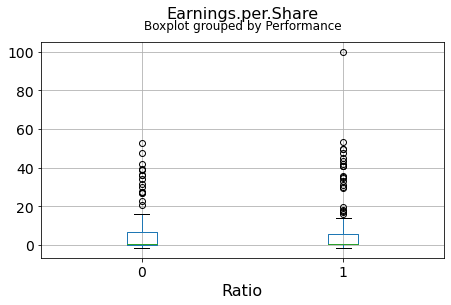

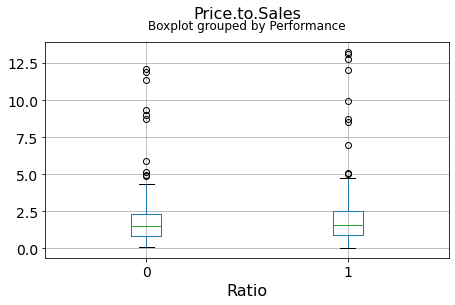

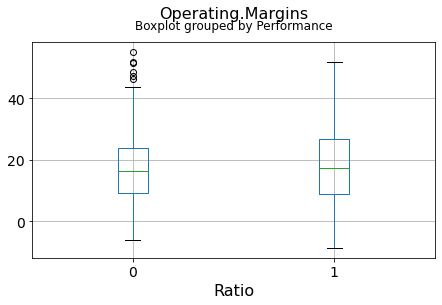

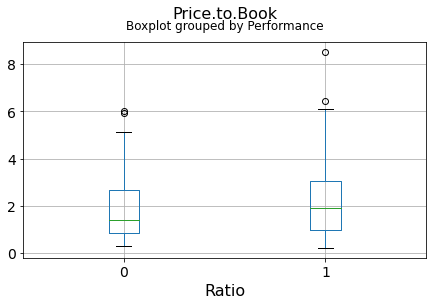

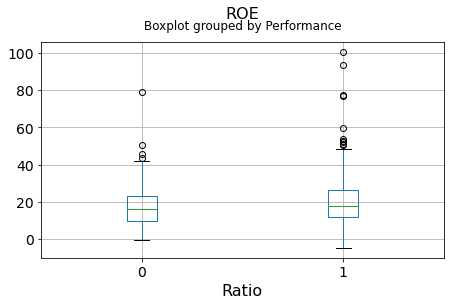

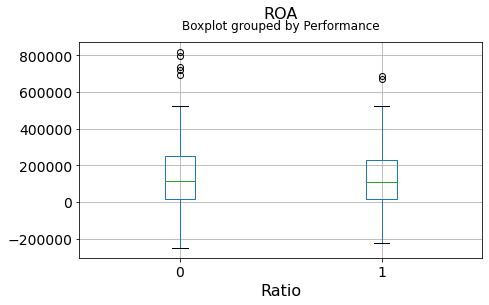

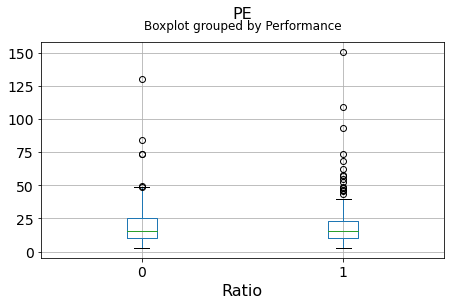

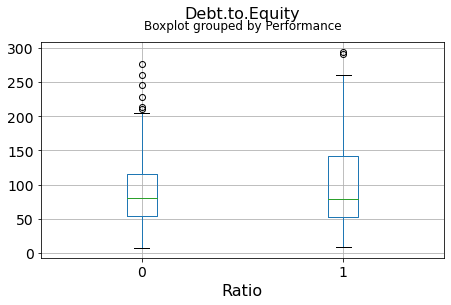

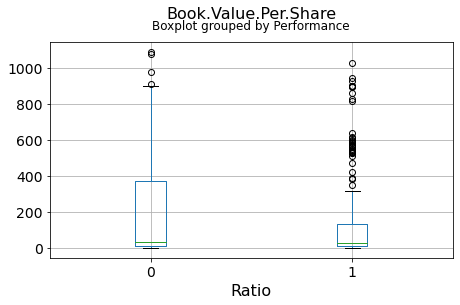

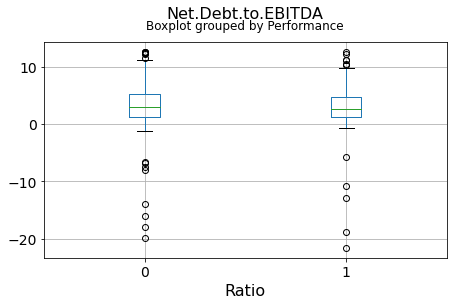

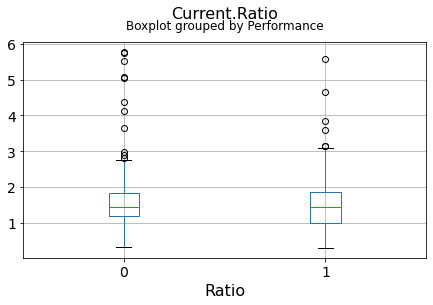

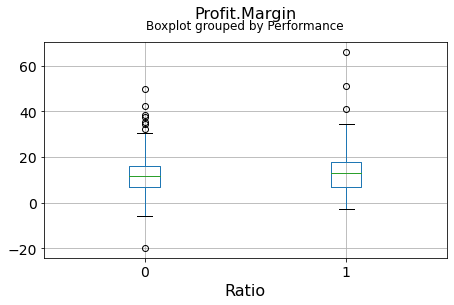

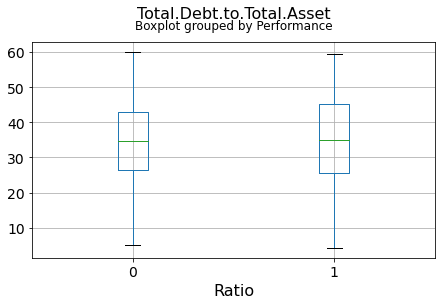

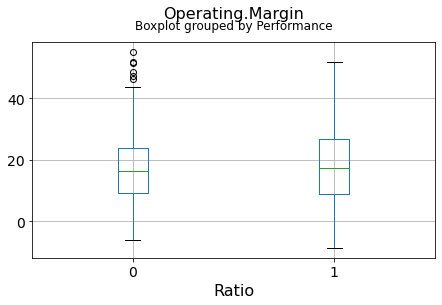

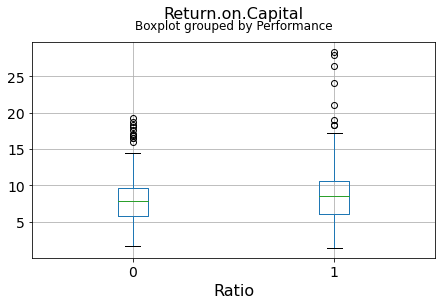

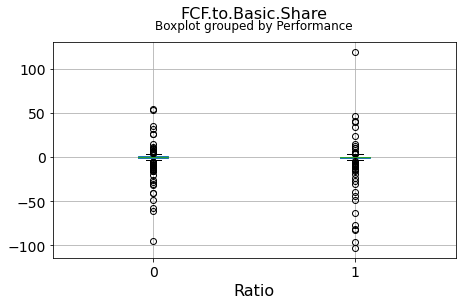

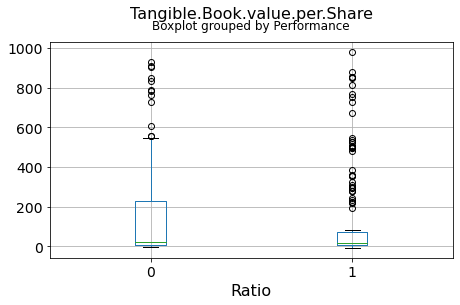

In [4]:
for c in df.columns[3:]:
    df.boxplot(c,by='Performance',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Ratio", fontsize=16)

Below is an example of class seperation using two variables

In [7]:
df.columns[2:]

Index(['Performance', 'Earnings.per.Share', 'Price.to.Sales',
       'Operating.Margins', 'Price.to.Book', 'ROE', 'ROA', 'PE',
       'Debt.to.Equity', 'Book.Value.Per.Share', 'Net.Debt.to.EBITDA',
       'Current.Ratio', 'Profit.Margin', 'Total.Debt.to.Total.Asset',
       'Operating.Margin', 'Return.on.Capital', 'FCF.to.Basic.Share',
       'Tangible.Book.value.per.Share'],
      dtype='object')

Text(0, 0.5, 'Current.Ratio')

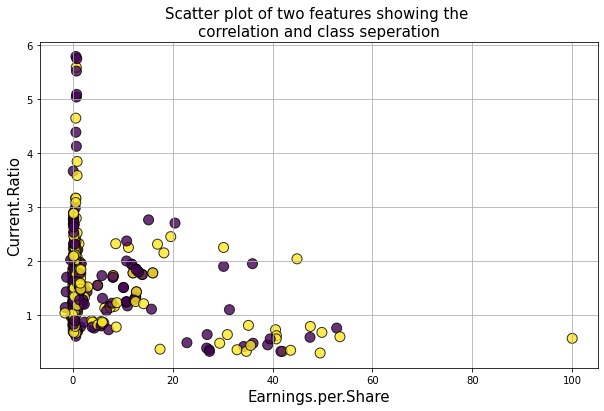

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['Earnings.per.Share'],df['Current.Ratio'],c=df['Performance'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("Earnings.per.Share",fontsize=15)
plt.ylabel("Current.Ratio",fontsize=15)

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

/var/folders/x9/qm1wqkb56hgfqvnwptpd40k40000gn/T/ipykernel_52444/3795380570.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
/var/folders/x9/qm1wqkb56hgfqvnwptpd40k40000gn/T/ipykernel_52444/3795380570.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


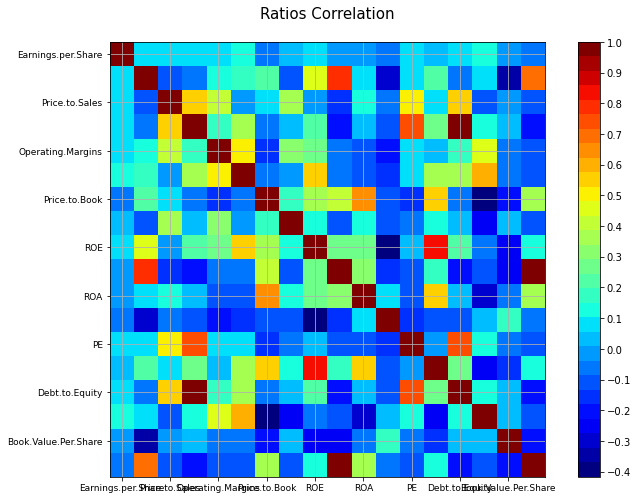

In [9]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Ratios Correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df.iloc[:,2:])

## Naive Bayes Classification

#### Test/train split

In [13]:
df_target = df.iloc[:,2] # Define a dataframe with only target results i.e.
df_feat = df.iloc[:,3:20]

In [14]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=test_size)

#### Classification using GaussianNB

Given a class variable $y$ and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Using the naive independence assumption that
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
for all $i$, this relationship is simplified to
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use [**Maximum A Posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

***GaussianNB ()*** implements the Gaussian Naive Bayes algorithm for classification. **The likelihood of the features is assumed to be Gaussian**:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nbc = GaussianNB()

In [18]:
nbc.fit(X_train,y_train)

GaussianNB()

#### Prediction, classification report, and confusion matrix

In [20]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 104 test samples is 51


In [21]:
nbc.get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}

In [22]:
from sklearn.metrics import classification_report

In [24]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        82
           1       0.22      0.50      0.30        22

    accuracy                           0.51       104
   macro avg       0.50      0.51      0.46       104
weighted avg       0.67      0.51      0.55       104



In [25]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2'], columns=['Class 1','Class 2'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Class 1,Class 2
Class 1,42,11
Class 2,40,11



** This showed that even in the presence of corrletation among features, the Naive Bayes algorithm performed quite well and could seperate the classes easily ** 

In [29]:
pd.DataFrame(nbc.predict_proba(X_test))

,0,1
0,0.802232,0.197768
1,0.808230,0.191770
2,0.265854,0.734146
3,0.760571,0.239429
4,0.754255,0.245745
...,...,...
99,0.945692,0.054308
100,0.757512,0.242488
101,0.780769,0.219231
102,0.770945,0.229055
